In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, f1_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import sklearn
import statsmodels.api as sm

In [2]:
# Veri Seti Okuma
columns = ['Cinsiyet', 'Yas', 'Boy', 'Kilo', 'Spor', 'Sigara', 'Kronik', 'Yakinlar', 'Beslenme', 'Maske', 'Asi', 'Covid19']
dataset = pd.read_csv('dataset_yeni.csv', names = columns, header=1)
dataset.head()

,Cinsiyet,Yas,Boy,Kilo,Spor,Sigara,Kronik,Yakinlar,Beslenme,Maske,Asi,Covid19
0,Erkek,24,170,77,4,Hayir,Hayir,Hayir,4,4,2,Hayir
1,Erkek,23,185,72,3,Evet,Hayir,Hayir,3,2,2,Hayir
2,Erkek,24,170,77,4,Hayir,Hayir,Hayir,4,4,2,Hayir
3,Erkek,52,179,117,2,Hayir,Evet,Evet,2,4,4,Evet
4,Kadin,23,171,57,1,Evet,Hayir,Evet,5,5,3,Hayir


In [3]:
# Makine ogrenme algoritmalari icin kategorileri 1 ve 0'lara cevirdik
for column in columns:
    if column == 'Cinsiyet':
        dataset.loc[dataset[column] == 'Kadin', column] = 0
        dataset.loc[dataset[column] == 'Erkek', column] = 1
        
    if column == 'Sigara' or column == 'Kronik' or column == 'Yakinlar' or column == 'Covid19':
        dataset.loc[dataset[column] == 'Hayir', column] = 0
        dataset.loc[dataset[column] == 'Evet', column] = 1
        
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1:].values.astype('float').ravel()
dataset.head()

,Cinsiyet,Yas,Boy,Kilo,Spor,Sigara,Kronik,Yakinlar,Beslenme,Maske,Asi,Covid19
0,1,24,170,77,4,0,0,0,4,4,2,0
1,1,23,185,72,3,1,0,0,3,2,2,0
2,1,24,170,77,4,0,0,0,4,4,2,0
3,1,52,179,117,2,0,1,1,2,4,4,1
4,0,23,171,57,1,1,0,1,5,5,3,0


In [4]:
# Makine Ogrenmesi Algoritmalarini kullandigimiz ve dogruluk metriklerini ekrana bastirdigimiz fonksiyon
def getPerformanceMetrics(X, y):
    names = ["SVC", "KNN", "RandomForest", "DTree", "Gaussian"]
        
    classifiers = [
        SVC(C = 5, degree = 3),
        KNeighborsClassifier(n_neighbors = 10),
        RandomForestClassifier(n_estimators=100, criterion='entropy'),
        DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=15),
        GaussianProcessClassifier(max_iter_predict = 100)
    ]
        
        
    for name, classifier in zip(names, classifiers): 

        y_pred = cross_val_predict(classifier, X, y, cv=10)
        cm = confusion_matrix(y, y_pred)
        
        print("*****************************")
        print(name," Sonuclari:")
        disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)        
        fig, ax = plt.subplots(figsize=(5,5))
        disp_cm.plot(ax=ax)
        disp_cm.ax_.set_title(name)

        
        print("Accuracy: ",accuracy_score(y, y_pred))
        print("Recall: ",recall_score(y, y_pred, average = 'macro'))
        print("Precision: ",precision_score(y, y_pred, average ='macro'))
        print("F1 Score : ",f1_score(y, y_pred, average='macro'))
        print("Cohens Kappa : ",cohen_kappa_score(y, y_pred))

*****************************
SVC  Sonuclari:
Accuracy:  0.5979899497487438
Recall:  0.5
Precision:  0.2989949748743719
F1 Score :  0.37421383647798745
Cohens Kappa :  0.0
*****************************
KNN  Sonuclari:
Accuracy:  0.592964824120603
Recall:  0.5429096638655462
Precision:  0.5571808510638298
F1 Score :  0.5316558677397797
Cohens Kappa :  0.09204078183968911


/home/deniz/anaconda3/envs/bitirme/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*****************************
RandomForest  Sonuclari:
Accuracy:  0.7185929648241206
Recall:  0.7032563025210083
Precision:  0.7069961489088575
F1 Score :  0.7048103411739775
Cohens Kappa :  0.409870790086846
*****************************
DTree  Sonuclari:
Accuracy:  0.6482412060301508
Recall:  0.6341911764705883
Precision:  0.6341911764705883
F1 Score :  0.6341911764705883
Cohens Kappa :  0.2683823529411765
*****************************
Gaussian  Sonuclari:
Accuracy:  0.5276381909547738
Recall:  0.5067226890756302
Precision:  0.5067810976901885
F1 Score :  0.5066983122362869
Cohens Kappa :  0.013500685581689709


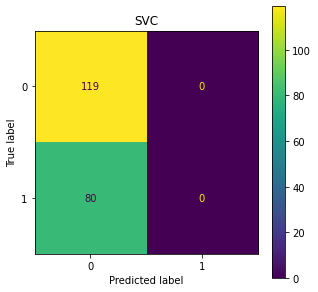

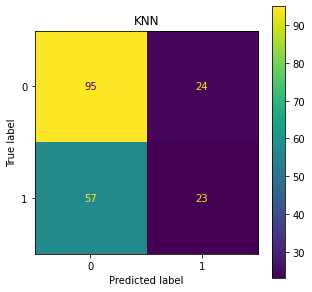

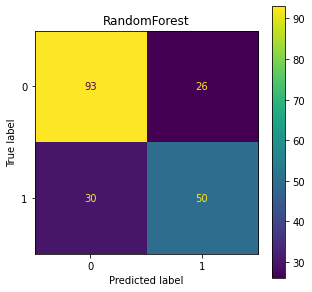

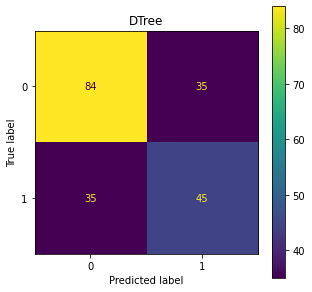

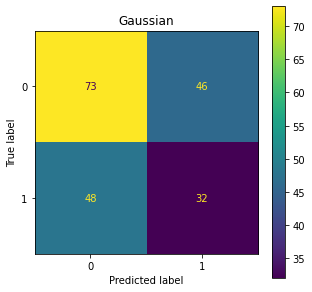

In [5]:
# Verilerde oynama yapmadan elde edilen sonuclar
getPerformanceMetrics(X,y)

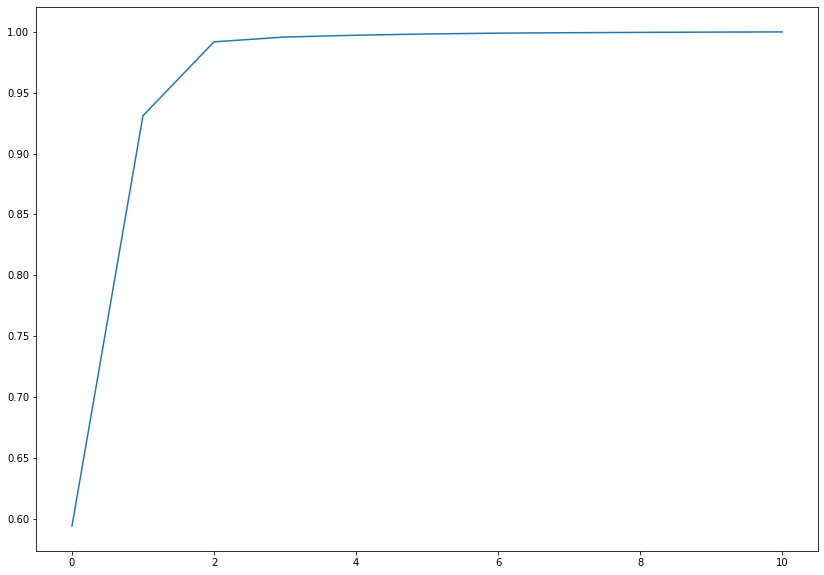

In [6]:
#PCA uyguladigimizda degiskenlerin sonuca kumulatif etkisini gosteren grafik
pca = sklearn.decomposition.PCA(whiten=True).fit(X)
plt.figure(figsize=(14,10))                 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

components:  3
variance ratio:  [0.59386704 0.33727727 0.06068849]
sum:  0.9918327991577925
*****************************
SVC  Sonuclari:
Accuracy:  0.6331658291457286
Recall:  0.5847163865546219
Precision:  0.6128919372900337
F1 Score :  0.5779120783333818
Cohens Kappa :  0.18171576634934938
*****************************
KNN  Sonuclari:
Accuracy:  0.6080402010050251
Recall:  0.5452731092436975
Precision:  0.5768270944741534
F1 Score :  0.5205707931801334
Cohens Kappa :  0.09996520932390118
*****************************
RandomForest  Sonuclari:
Accuracy:  0.6080402010050251
Recall:  0.5657563025210084
Precision:  0.579948914431673
F1 Score :  0.5612279511533242
Cohens Kappa :  0.13891046266503937
*****************************
DTree  Sonuclari:
Accuracy:  0.5728643216080402
Recall:  0.5506827731092436
Precision:  0.5518817204301075
F1 Score :  0.5509093322713394
Cohens Kappa :  0.10241443353674717
*****************************
Gaussian  Sonuclari:
Accuracy:  0.6381909547738693
Recall:  

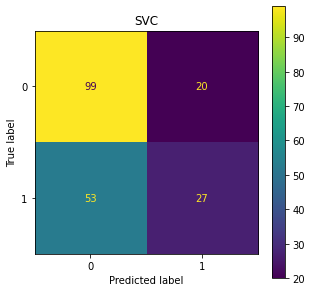

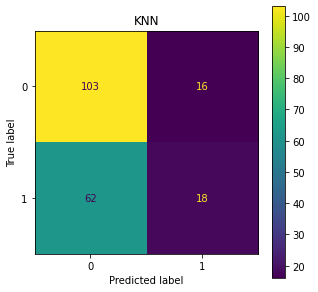

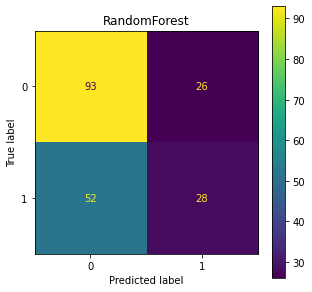

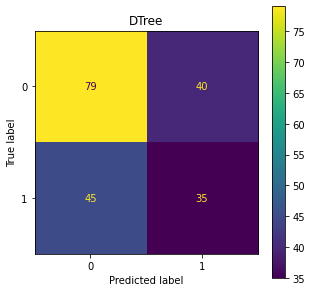

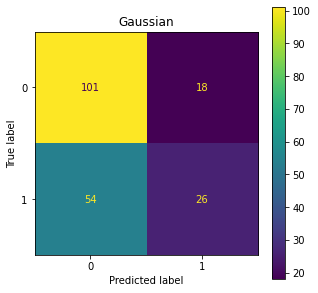

In [7]:
# 0.99 oraniyla veri setini ifade edecek sekilde pca uyguladigimizda gelen sonuclar
def pcaFitTransform(X, n_components):
    pca = sklearn.decomposition.PCA(n_components=n_components, whiten=True)
    pca.fit(X)
    X_pca = pca.transform(X)
    print("components: ",len(pca.explained_variance_ratio_))
    print("variance ratio: ", pca.explained_variance_ratio_)
    print("sum: ", sum(pca.explained_variance_ratio_))
    return X_pca

X_pca = pcaFitTransform(X, 0.95)
getPerformanceMetrics(X_pca, y)

*****************************
SVC  Sonuclari:
Accuracy:  0.5979899497487438
Recall:  0.5
Precision:  0.2989949748743719
F1 Score :  0.37421383647798745
Cohens Kappa :  0.0
*****************************
KNN  Sonuclari:
Accuracy:  0.592964824120603
Recall:  0.5429096638655462
Precision:  0.5571808510638298
F1 Score :  0.5316558677397797
Cohens Kappa :  0.09204078183968911


/home/deniz/anaconda3/envs/bitirme/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*****************************
RandomForest  Sonuclari:
Accuracy:  0.7085427135678392
Recall:  0.6887079831932773
Precision:  0.6964676290463692
F1 Score :  0.6913243474540008
Cohens Kappa :  0.38370354549337893
*****************************
DTree  Sonuclari:
Accuracy:  0.6633165829145728
Recall:  0.6508928571428572
Precision:  0.6502929483155472
F1 Score :  0.6505752548680452
Cohens Kappa :  0.3011688243618639
*****************************
Gaussian  Sonuclari:
Accuracy:  0.5276381909547738
Recall:  0.5067226890756302
Precision:  0.5067810976901885
F1 Score :  0.5066983122362869
Cohens Kappa :  0.013500685581689709


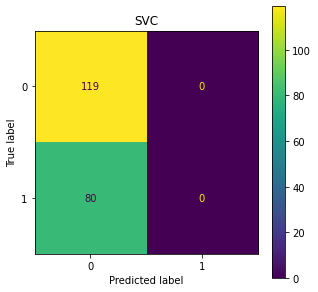

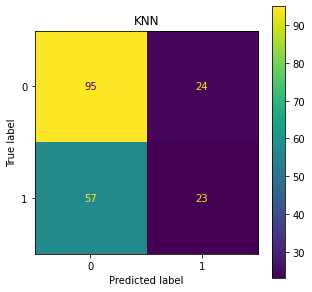

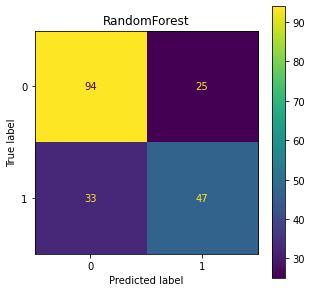

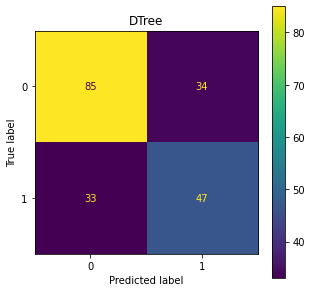

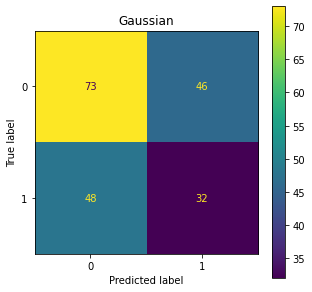

In [8]:
# MinMaxScaler ile butun verileri 0-1 araligina getirdigimizde olusan sonuclar
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_df = pd.DataFrame(scaler.fit_transform(dataset.values), columns=dataset.columns)

X_scaled = dataset.iloc[:,0:-1].values
y_scaled = dataset.iloc[:,-1:].values.astype('int').ravel()
getPerformanceMetrics(X_scaled, y)

In [9]:
# Forward Selection
x1 = dataset.iloc[:,0:-1].astype(float) #features
y1 = dataset.iloc[:,-1:].values.reshape((199,)) #genres
def modelResult(x, y):
    
    #sabitin eklenmesi
    x = sm.add_constant(x)
    
    #modelin oluşturulması
    model = sm.OLS(y.astype(float), x.astype(float)).fit()
    
    #model performans sonuçları
    print(model.summary())
modelResult(x1,y1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     8.191
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.22e-11
Time:                        19:38:50   Log-Likelihood:                -101.41
No. Observations:                 199   AIC:                             226.8
Df Residuals:                     187   BIC:                             266.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2182      0.824     -0.265      0.7

In [10]:
def forwardSelection(x, y, p_value_level=0.05):

    # başlangıç değişkenleri
    initial_features = x.columns.tolist()

    # en iyi değişkenlerin listesi
    best_features = []

    loop_count = 0
    
    # değişken sayısı kadar while döngüsünün çalışması
    while (len(initial_features) > 0):

        loop_count += 1


        # seçilen değişkenler kalan değişkenlerden çıkarılır
        remaining_features = list(set(initial_features) - set(best_features))


        # kalan değişkenler için p değer tablosu
        new_pval = pd.Series(index=remaining_features, dtype='float64')

        # kalan değişkenlerin tek p değeri hesaplanır
        for feature in remaining_features:
            # verilen değişkenler ile model oluşturulur
            model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float)[best_features + [feature]])).fit()

            # newpval tablosuna değişken ismi ve p değeri eklenir
            new_pval[feature] = model.pvalues[feature]

        # new_pval tablosundaki minimum p değeri alınır
        min_p_value = new_pval.min()

        # eğer p değeri 0.05 altındaysa while döngüsü devam eder
        if(min_p_value < p_value_level):
            best_features.append(new_pval.idxmin())

        
        # eğer P değeri 0.05'in üzerinde ise döngü sona erer
        else:
            print("Mininum P değeri 0.05'ten küçük değişken kalmadi")
            break
    
    print("Best Features:",best_features)
    best_df = pd.DataFrame()
    for feature in best_features:
        best_df = pd.concat([best_df,x['{}'.format(feature)]],axis=1)
    return best_df.iloc[:,0:].values

In [11]:
X_selected = forwardSelection(x1, y1)

Mininum P değeri 0.05'ten küçük değişken kalmadi
Best Features: ['Yakinlar', 'Sigara', 'Asi', 'Yas']


*****************************
SVC  Sonuclari:
Accuracy:  0.6733668341708543
Recall:  0.6449579831932772
Precision:  0.6584385763490241
F1 Score :  0.6474035709418019
Cohens Kappa :  0.29910593335139535
*****************************
KNN  Sonuclari:
Accuracy:  0.542713567839196
Recall:  0.4926995798319328
Precision:  0.49054421768707485
F1 Score :  0.47814184029278695
Cohens Kappa :  -0.01559082496775277
*****************************
RandomForest  Sonuclari:
Accuracy:  0.6984924623115578
Recall:  0.6844012605042017
Precision:  0.6860033905488451
F1 Score :  0.685126582278481
Cohens Kappa :  0.3703195865415041
*****************************
DTree  Sonuclari:
Accuracy:  0.6381909547738693
Recall:  0.6114495798319328
Precision:  0.6191064211944319
F1 Score :  0.6127567567567568
Cohens Kappa :  0.22851604566013362
*****************************
Gaussian  Sonuclari:
Accuracy:  0.6180904522613065
Recall:  0.592594537815126
Precision:  0.5976190476190476
F1 Score :  0.5934408602150537
Cohens Kapp

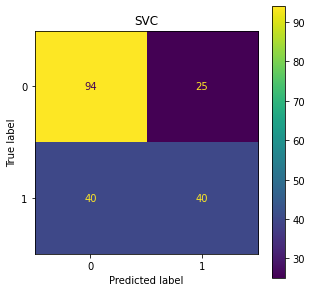

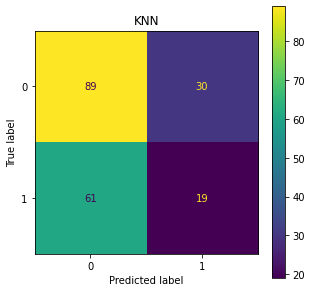

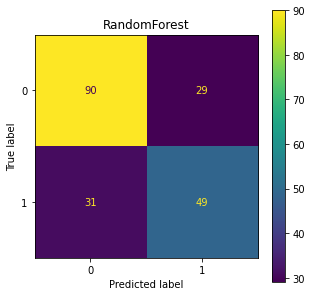

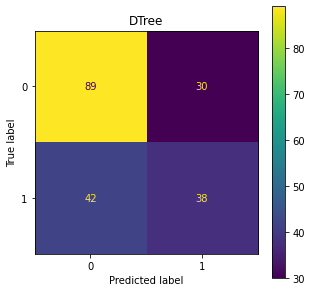

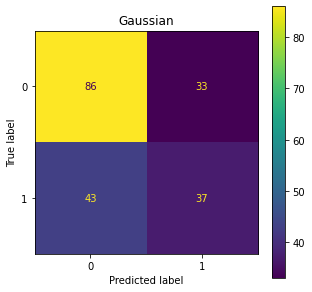

In [12]:
# P degerine gore forward selection ile secilen ozelliklerin sonuclari
getPerformanceMetrics(X_selected, y)